<a href="https://colab.research.google.com/github/samanvithkashyap/lenet-5/blob/main/lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, datasets, optimizers, losses
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = x_train[..., tf.newaxis]
    x_test = x_test[..., tf.newaxis]
    print("Dataset Loaded\n")
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset Loaded



In [8]:
def build_lenet5(in_shape=(28, 28, 1), classes=10):
    model = Sequential([
        layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=in_shape),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=16, kernel_size=5, activation='relu', padding='valid'),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=120, kernel_size=5, activation='relu', padding='valid'),
        layers.Flatten(),
        layers.Dense(units=84, activation='relu'),
        layers.Dense(units=classes)
    ])
    return model
model = build_lenet5()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9918 - val_loss: 0.0326
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9972 - loss: 0.0094 - val_accuracy: 0.9896 - val_loss: 0.0335
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9972 - loss: 0.0085 - val_accuracy: 0.9878 - val_loss: 0.0496
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9976 - loss: 0.0073 - val_accuracy: 0.9868 - val_loss: 0.0547
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9974 - loss: 0.0091 - val_accuracy: 0.9905 - val_loss: 0.0426
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9976 - loss: 0.0073 - val_accuracy: 0.9912 - val_loss: 0.0357
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9881 - val_loss: 0.0579
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9970 - loss: 0.0091 - val_accuracy: 0.

313/313 - 1s - 4ms/step - accuracy: 0.9893 - loss: 0.0462

Final Test Accuracy: 98.93%


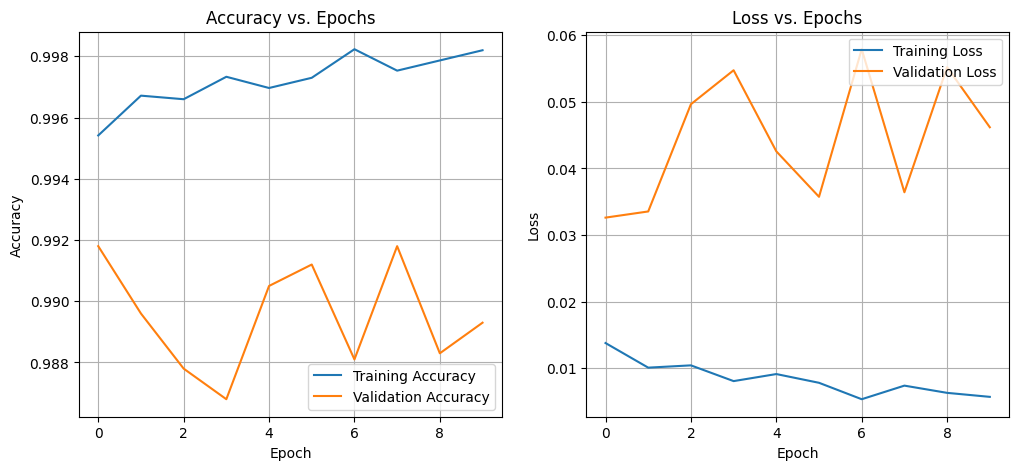

In [11]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")

# Plotting
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/drive')
save_path = '/content/drive/My Drive/lenet5_mnist_model.keras'
model.save(save_path)
print(f"Model saved successfully at: {save_path}")

Mounted at /content/drive
Model saved successfully at: /content/drive/My Drive/lenet5_mnist_model.keras
